In [ ]:
#Import libraries

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# MEBS in time  

### Comand line of MEBS 

Example comand line of mebs in the metagenomic dataset containing 12  microbial mat metagenomes 



```bash
perl  mebs.pl -input mats_fasta/ -type metagenomic -fdr 0.0001 -comp > mats.fdr0.0001.tsv 
```


### MEBS output  

In [24]:
%%bash
less -S  ../data/mats.fdr0.0001.tsv | cut -f 1,2,3,4,5,6 > ../data/suplementary.fdr.scores.tab


###  Parsing the output 

In [25]:
%%bash 

sed 's/__metahit.final.contigs.fa.prodigal.faa//g' ../data/mats.fdr0.0001.tsv   | sed 's/_metahit.final.contigs.fa.prodigal.faa//g'  | sed 's/\*//g'> mats.fasta.2plot.tab
head -5 mats.fasta.2plot.tab


	sulfur	carbon	oxygen	iron	nitrogen	<sulfur comp>	sulfur_1	sulfur_2	sulfur_3	sulfur_4	sulfur_5	sulfur_6	sulfur_7	sulfur_8	sulfur_9	sulfur_10	sulfur_11	sulfur_12	sulfur_13	sulfur_14	sulfur_15	sulfur_16	sulfur_17	sulfur_18	sulfur_19	sulfur_20	sulfur_21	sulfur_22	sulfur_23	sulfur_24	sulfur_25	sulfur_26	sulfur_27	sulfur_28	sulfur_29	<carbon comp>	carbon_1	carbon_2	carbon_3	carbon_4	carbon_5	carbon_6	carbon_7	carbon_8	carbon_9	carbon_10	carbon_12	carbon_13
S9	8.714	35.156	6.853	9.391	19.180	84.8	100.0	70.0	100.0	76.5	75.0	60.0	77.8	100.0	100.0	70.0	72.4	100.0	100.0	100.0	71.4	68.8	91.7	100.0	85.7	71.4	0.0	85.7	81.8	100.0	100.0	100.0	100.0	100.0	100.0	61.1	87.5	58.3	100.0	36.4	75.0	50.0	92.9	66.7	28.6	100.0	37.5	0.0
S8	8.535	42.132	6.839	9.391	19.226	87.6	100.0	70.0	100.0	76.5	75.0	60.0	77.8	100.0	100.0	70.0	65.5	100.0	100.0	100.0	71.4	62.5	100.0	100.0	85.7	57.1	100.0	85.7	81.8	100.0	100.0	100.0	100.0	100.0	100.0	63.3	87.5	58.3	100.0	45.5	75.0	50.0	92.9	100.0	28.6	84.6	37.5	0.0
S6	8.262	33.

### Convert to a pandas dataframe 

In [2]:
scores=pd.read_table("mats.fasta.2plot.tab",index_col=0)
scores=scores[['sulfur', 'carbon', 'oxygen','nitrogen', 'iron']]
scores

,sulfur,carbon,oxygen,nitrogen,iron
S9,8.714,35.156,6.853,19.180,9.391
S8,8.535,42.132,6.839,19.226,9.391
S6,8.262,33.394,6.839,18.785,9.391
S3,9.085,29.336,6.839,19.048,9.391
S7,8.901,42.838,6.839,19.226,9.391
S5,8.989,35.881,6.839,19.226,9.391
S12,8.901,37.170,6.839,19.226,9.391
S1,8.505,36.301,6.839,19.031,9.391
S4,8.696,33.383,6.839,19.650,9.391
S10,8.763,40.041,6.554,18.946,9.391


### Generate a metadata file 
The sample names must be the same

In [3]:
ids=pd.read_table("../data/samples_id.tab",index_col=0)
ids.head()

,Time,Site
Sample,,
S1,Autumn 12,A
S2,Autumn 12,B
S3,Autumn 12,C
S4,Spring 13,A
S5,Spring 13,B


### Concatenate into a single file 

In [4]:
concat=pd.concat([ids, scores],axis=1)
concat.max()

Time        Spring 14
Site                C
sulfur          9.085
carbon         42.838
oxygen          6.853
nitrogen        19.65
iron            9.391
dtype: object

### Plot scores


In [ ]:
sns.set(font_scale=1.5)
X = 12
Y = 20

fig = plt.figure(figsize=(X, Y))


#############################################
plt.subplot(511)
ax=sns.pointplot(x="Time", y="oxygen", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"],  palette="tab10", size=1)

plt.title("A",loc='left',weight='bold',size='large')
plt.title("Oxygen Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(512)
ax=sns.pointplot(x="Time", y="nitrogen", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
plt.title("B",loc='left',weight='bold',size='large')
plt.title("Nitrogen Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
#linestyles=[":", ":",":"]
plt.subplot(513)
ax=sns.pointplot(x="Time", y="iron", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
plt.title("C",loc='left',weight='bold',size='large')
plt.title("Iron Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(514)
ax=sns.pointplot(x="Time", y="sulfur", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10")
plt.title("D",loc='left',weight='bold',size='large')
plt.title("Sulfur Score",weight='bold',size='large')
plt.tight_layout()
#############################################
plt.subplot(515)
ax=sns.pointplot(x="Time", y="carbon", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], palette="tab10",scatter_kws={'s':20})
plt.title("F",loc='left',weight='bold',size='large')
plt.title("Methane Score",weight='bold',size='large')
plt.tight_layout()

plt.savefig("../figures/MEBS_mats.png",bbox_inches='tight',dpi=500)

As recomended by the reviewer 2: It seems it would be more informative to present the MEBS scores as percentages rather than bit counts with variable maxima, particularly when comparing “similar patterns” 

First, we use the MSL values of each metagenome,due to MEBS is build under the premise to allocate the corresponding entropies for each MSL 

```bash
for FILE in *.faa; do perl -lne 'if(/^(>.*)/){$h=$1}else{$fa{$h}.=$_} END{ foreach $h (keys(%fa)){$m+=length($fa{$h})}; printf("%1.0f\t",$m/scalar(keys(%fa))) }' $FILE; echo $FILE; done > MSL.tab

```

In [15]:
mslmats=pd.read_table("../data/mslmats.tab", index_col=0)
mslmats

,Mg-rast,label,MSL,GenF
sample,,,,
S1,"4621754,3",ANOV12,103,100
S10,"4621753,3",AMAY14,103,100
S11,"4621757,3",BMAY14,100,100
S12,"4621761,3",CMAY14,101,100
S2,"4621758,3",BNOV12,115,100
S3,"4621762,3",CNOV12,117,100
S4,"4621752,3",AMAY13,104,100
S5,"4621756,3",BMAY13,99,100
S6,"4621760,3",CMAY13,106,100


We normalized according to the [maximum scores for each MSL](https://eead-csic-compbio.github.io/metagenome_Pfam_score/READMEv1.html#4_maximum_scores)

In [16]:
maxscores=pd.read_table("../data/maximumscores.tab", index_col=0)
maxscores


,sulfur,carbon,oxygen,iron,nitrogen
,,,,,
Genomic data,16.018,85.332,10.703,10.464,22.079
30,13.676,84.503,10.438,8.843,20.642
60,16.818,85.347,11.253,9.567,22.148
100,15.566,85.221,9.965,10.676,21.430
150,15.848,84.810,10.152,10.316,21.379
200,15.887,84.765,10.463,9.832,21.938
250,16.031,85.057,10.387,10.215,21.853
300,15.929,84.942,10.569,10.284,21.968


Due to the MSL of the metagenomes is around 100 we selected the maximum scores of all the cycles in GenF 100

In [17]:
max100=maxscores.iloc[3]
max100


sulfur      15.566
carbon      85.221
oxygen       9.965
iron        10.676
nitrogen    21.430
Name: 100 , dtype: float64

In [18]:
def sulfur_per(x):
    pct=float(x/15.566)
    return round(pct,2)

def carbon_per(x):
    pct=float(x/85.221)
    return round(pct,2)

def oxygen_per(x):
    pct=float(x/9.965)
    return round(pct,2)

def iron_per(x):
    pct=float(x/10.676)
    return round(pct,2)

def nitrogen_per(x):
    pct=float(x/21.430)
    return round(pct,2)

In [19]:
scores

,sulfur,carbon,oxygen,nitrogen,iron
S9,8.714,35.156,6.853,19.180,9.391
S8,8.535,42.132,6.839,19.226,9.391
S6,8.262,33.394,6.839,18.785,9.391
S3,9.085,29.336,6.839,19.048,9.391
S7,8.901,42.838,6.839,19.226,9.391
S5,8.989,35.881,6.839,19.226,9.391
S12,8.901,37.170,6.839,19.226,9.391
S1,8.505,36.301,6.839,19.031,9.391
S4,8.696,33.383,6.839,19.650,9.391
S10,8.763,40.041,6.554,18.946,9.391


### Compute the percentage according to the maximum and create a new df

In [20]:
scores['sulfur%'] = scores.sulfur.apply(sulfur_per)
scores['carbon%'] = scores.carbon.apply(carbon_per)
scores['oxygen%'] = scores.oxygen.apply(oxygen_per)
scores['nitrogen%'] = scores.nitrogen.apply(nitrogen_per)
scores['iron%'] = scores.iron.apply(iron_per)
scores

,sulfur,carbon,oxygen,nitrogen,iron,sulfur%,carbon%,oxygen%,nitrogen%,iron%
S9,8.714,35.156,6.853,19.180,9.391,0.56,0.41,0.69,0.90,0.88
S8,8.535,42.132,6.839,19.226,9.391,0.55,0.49,0.69,0.90,0.88
S6,8.262,33.394,6.839,18.785,9.391,0.53,0.39,0.69,0.88,0.88
S3,9.085,29.336,6.839,19.048,9.391,0.58,0.34,0.69,0.89,0.88
S7,8.901,42.838,6.839,19.226,9.391,0.57,0.50,0.69,0.90,0.88
S5,8.989,35.881,6.839,19.226,9.391,0.58,0.42,0.69,0.90,0.88
S12,8.901,37.170,6.839,19.226,9.391,0.57,0.44,0.69,0.90,0.88
S1,8.505,36.301,6.839,19.031,9.391,0.55,0.43,0.69,0.89,0.88
S4,8.696,33.383,6.839,19.650,9.391,0.56,0.39,0.69,0.92,0.88
S10,8.763,40.041,6.554,18.946,9.391,0.56,0.47,0.66,0.88,0.88


## New dataframe

In [21]:
concat=pd.concat([ids, scores],axis=1)
concat.head()

,Time,Site,sulfur,carbon,oxygen,nitrogen,iron,sulfur%,carbon%,oxygen%,nitrogen%,iron%
S1,Autumn 12,A,8.505,36.301,6.839,19.031,9.391,0.55,0.43,0.69,0.89,0.88
S10,Spring 14,A,8.763,40.041,6.554,18.946,9.391,0.56,0.47,0.66,0.88,0.88
S11,Spring 14,B,8.763,40.041,6.554,18.826,9.391,0.56,0.47,0.66,0.88,0.88
S12,Spring 14,C,8.901,37.170,6.839,19.226,9.391,0.57,0.44,0.69,0.90,0.88
S2,Autumn 12,B,8.831,36.355,6.135,18.829,9.339,0.57,0.43,0.62,0.88,0.87


## Plot MEBS in percentage

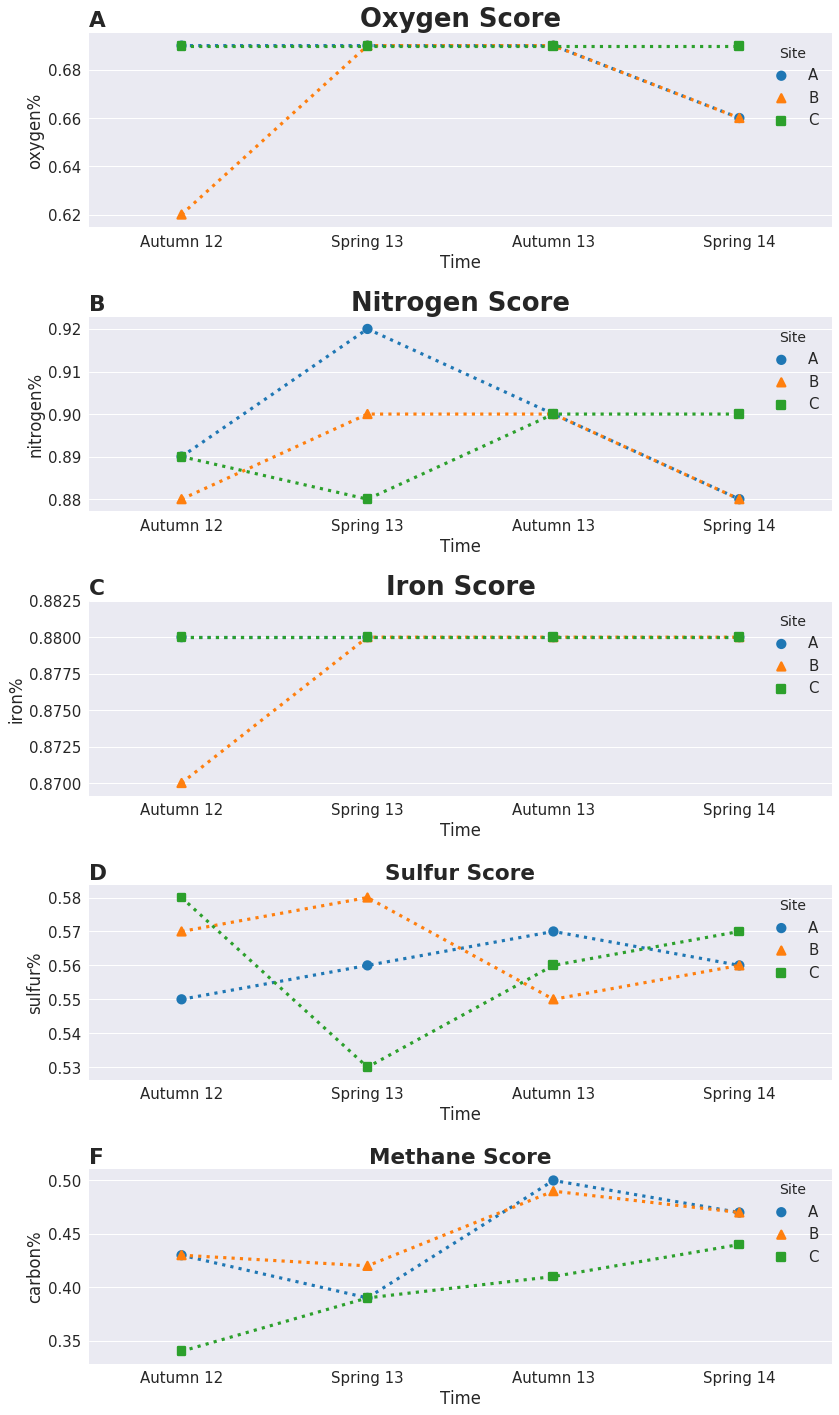

In [22]:
sns.set(font_scale=1.5)
X = 12
Y = 20

fig = plt.figure(figsize=(X, Y))


#############################################
plt.subplot(511)
ax=sns.pointplot(x="Time", y="oxygen%", hue="Site", data=concat, 
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"], palette="tab10")
plt.title("A",loc='left',weight='bold',size='large')
plt.title("Oxygen Score",weight='bold',size='x-large')

plt.tight_layout()
#############################################
plt.subplot(512)
ax=sns.pointplot(x="Time", y="nitrogen%", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("B",loc='left',weight='bold',size='large')
plt.title("Nitrogen Score",weight='bold',size='x-large')

plt.tight_layout()
#############################################
plt.subplot(513)
ax=sns.pointplot(x="Time", y="iron%", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10")
plt.title("C",loc='left',weight='bold',size='large')
plt.title("Iron Score",weight='bold',size='x-large')
plt.tight_layout()
#############################################
plt.subplot(514)
ax=sns.pointplot(x="Time", y="sulfur%", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10"),
plt.title("D",loc='left',weight='bold',size='large')
plt.title("Sulfur Score",weight='bold',size='large')
plt.tight_layout()
#############################################
plt.subplot(515)
ax=sns.pointplot(x="Time", y="carbon%", hue="Site", data=concat,
                 order=['Autumn 12',"Spring 13","Autumn 13", "Spring 14"],
                 markers=["o","^","s"], linestyles=[":", ":",":"],palette="tab10",)
plt.title("F",loc='left',weight='bold',size='large')
plt.title("Methane Score",weight='bold',size='large')
plt.tight_layout()